````
AESM1450 - Geophysical Prospecting  -- Controlled-Source ElectroMagnetic (CSEM) Modelling
````
# 1. Marine CSEM in the frequency domain

In [1]:
import empymod
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook
plt.style.use('ggplot')

# A short introduction to `empymod`

`empymod` computes the electromagnetic responses of a layered medium. As such it is very fast, in comparison to the 3D modellers we are going to use later. The modeller can do many things: electric and magnetic sources and receivers, of arbitrary length and arbitrarily rotated; or loops.

However, in this course we are only going to use two very specific setups, for which we use the routine `empymod.dipole()`. The two types of surveys we consider are:
- Infinitesimal small, electric dipole sources and receivers.
- $y=0$ for source and receivers.
- Two configurations:
  - Inline (Ex source; Ex receivers) => `empymod.dipole`-input `ab=11`;
  - Broadside (Ey source; Ey receivers) => `empymod.dipole`-input `ab=22`.

**=> Check the [manual of empymod](https://empymod.readthedocs.io) for more information and lots of examples. <=**


## In the following three introductory examples:
1. Single offset, many frequencies
2. Many offsets, single frequency
3. Many offsets, many frequencies

### Define model parameters for all three examples and tasks

In [3]:
# 1D depth model:
# - 1 km water
# - target at 2 km depth below seafloor, 40 m thick
depth = [0, -1000, -3000, -3040]

# Corresponding resistivity models:
res_background = [2e14, 0.3, 1, 1, 1]    # Background model
res_resistor = [2e14, 0.3, 1, 100, 1]    # Resistive model
res_conductor = [2e14, 0.3, 1, 0.01, 1]  # Conductive model

### Define survey parameters

In [4]:
# Infinitesimal small dipole source at
# x = 0 m, y = 0 m, z = -950 m 
source = [0, 0, -950]

# Receivers: 101 receivers from x=0.5-10 km, y=0, z=-1000
offsets = np.arange(5, 101)*100
receivers = [offsets, offsets*0, -1000]

# Field
ab = 11  # Inline (Exx)
# ab = 22  # Broadside (Eyy)

# Frequencies: 301 frequencies from 0.001-10 Hz
frequencies = np.logspace(-3, 1, 301)

## Example 1: single offset, many frequencies

In [5]:
# Get this receiver
ri = 45
receiver1 = [receivers[0][ri], receivers[1][ri], receivers[2]]
print(f"Offset: {receiver1[0]/1e3} km")

# Calculate it
resp_background1 = empymod.dipole(source, receiver1, depth, res_background, frequencies)
resp_resistor1 = empymod.dipole(source, receiver1, depth, res_resistor, frequencies)

Offset: 5.0 km

:: empymod END; runtime = 0:00:00.221866 :: 1 kernel call(s)


:: empymod END; runtime = 0:00:00.082123 :: 1 kernel call(s)



<IPython.core.display.Javascript object>


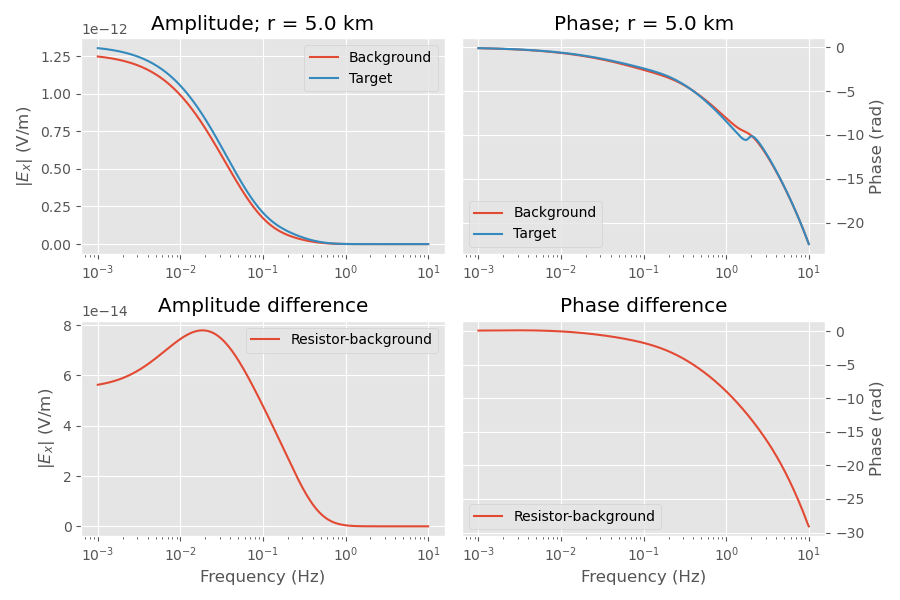

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9, 6))


# Amplitude
ax1.set_title(f"Amplitude; r = {receiver1[0]/1e3:.1f} km")

ax1.plot(frequencies, resp_background1.amp(), label='Background')
ax1.plot(frequencies, resp_resistor1.amp(), label='Target')

ax1.legend()
ax1.set_ylabel('$|E_x|$ (V/m)')
ax1.set_xscale('log')


# Phase
ax2.set_title(f"Phase; r = {receiver1[0]/1e3:.1f} km")

ax2.plot(frequencies, resp_background1.pha(), label='Background')
ax2.plot(frequencies, resp_resistor1.pha(), label='Target')

ax2.legend()
ax2.set_ylabel('Phase (rad)')
ax2.set_xscale('log')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")


# Amplitude difference
ax3.set_title(f"Amplitude difference")

ax3.plot(frequencies, (resp_resistor1-resp_background1).amp(), label='Resistor-background')

ax3.legend()
ax3.set_xlabel('Frequency (Hz)')
ax3.set_ylabel('$|E_x|$ (V/m)')
ax3.set_xscale('log')


# Phase difference
ax4.set_title(f"Phase difference")

ax4.plot(frequencies, (resp_resistor1-resp_background1).pha(), label='Resistor-background')

ax4.legend()
ax4.set_xlabel('Frequency (Hz)')
ax4.set_ylabel('Phase (rad)')
ax4.set_xscale('log')
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position("right")

fig.tight_layout()
fig.show()

## Example 2: many offsets, single frequency

In [7]:
# Get this frequenciesuency
fi = 180
frequency1 = frequencies[fi]
print(f"frequenciesuency: {frequency1:.2f} Hz")

# Calculate it
resp_background2 = empymod.dipole(source, receivers, depth, res_background, frequency1)
resp_resistor2 = empymod.dipole(source, receivers, depth, res_resistor, frequency1)

frequenciesuency: 0.25 Hz

:: empymod END; runtime = 0:00:00.047354 :: 1 kernel call(s)


:: empymod END; runtime = 0:00:00.042324 :: 1 kernel call(s)



<IPython.core.display.Javascript object>


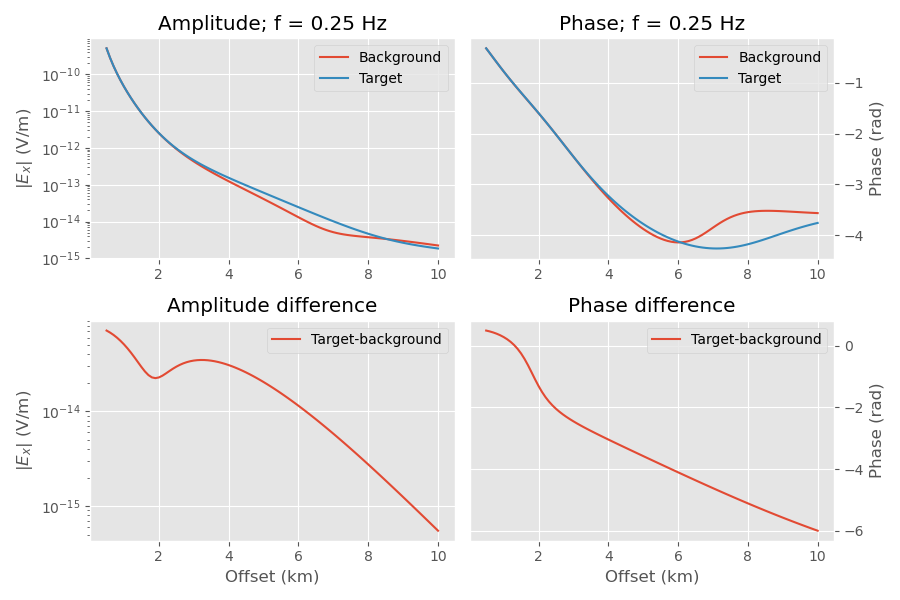

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9, 6))


# Amplitude
ax1.set_title(f"Amplitude; f = {frequency1:.2f} Hz")

ax1.plot(offsets/1e3, resp_background2.amp(), 'C0', label='Background')
ax1.plot(offsets/1e3, resp_resistor2.amp(), 'C1', label='Target')

ax1.legend()
ax1.set_ylabel('$|E_x|$ (V/m)')
ax1.set_yscale('log')


# Phase
ax2.set_title(f"Phase; f = {frequency1:.2f} Hz")

ax2.plot(offsets/1e3, resp_background2.pha(unwrap=True), 'C0', label='Background')
ax2.plot(offsets/1e3, resp_resistor2.pha(unwrap=True), 'C1', label='Target')

ax2.legend()
ax2.set_ylabel('Phase (rad)')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")


# Amplitude difference
ax3.set_title(f"Amplitude difference")

ax3.plot(offsets/1e3, (resp_resistor2-resp_background2).amp(), 'C0', label='Target-background')

ax3.legend()
ax3.set_xlabel('Offset (km)')
ax3.set_ylabel('$|E_x|$ (V/m)')
ax3.set_yscale('log')


# Phase difference
ax4.set_title(f"Phase difference")

ax4.plot(offsets/1e3, (resp_resistor2-resp_background2).pha(unwrap=True), 'C0', label='Target-background')

ax4.legend()
ax4.set_xlabel('Offset (km)')
ax4.set_ylabel('Phase (rad)')
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position("right")

fig.tight_layout()
fig.show()

## Example 3: many offsets, many frequencies

**Note**: The `htarg={'pts_per_dec': -1}` is just a flag to make it much faster (at the cost of precision, but neglectable).

In [9]:
# Calculate it
resp_background3 = empymod.dipole(source, receivers, depth, res_background, frequencies, htarg={'pts_per_dec': -1})
resp_resistor3 = empymod.dipole(source, receivers, depth, res_resistor, frequencies, htarg={'pts_per_dec': -1})


:: empymod END; runtime = 0:00:00.337936 :: 301 kernel call(s)


:: empymod END; runtime = 0:00:00.280268 :: 301 kernel call(s)



<IPython.core.display.Javascript object>


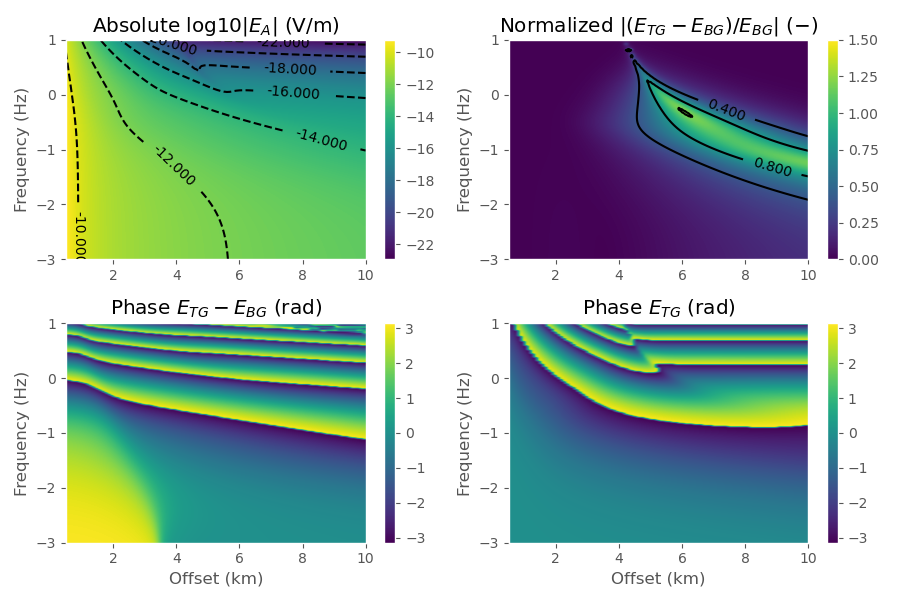

In [10]:
lfrequencies = np.log10(frequencies)

amperr = np.abs((resp_resistor3-resp_background3)/resp_background3)
ampabs = np.log10(np.abs(resp_resistor3))

phaerr = np.angle(resp_resistor3-resp_background3)
phaabs = np.angle(resp_resistor3) 

# Create figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9, 6))


# Plot absolute (amplitude) in log10
ax1.set_title(r'Absolute log10$|E_A|$ (V/m)')
cb1 = ax1.imshow(ampabs, interpolation='bicubic',
                 extent=[offsets[0]/1000, offsets[-1]/1000, lfrequencies[0], lfrequencies[-1]],
                 origin='lower', aspect='auto')
ax1.grid(False)
fig.colorbar(cb1, ax=ax1)
CS = ax1.contour(offsets/1000, lfrequencies, ampabs, colors='k')
ax1.clabel(CS, inline=1, fontsize=10)
ax1.set_ylim([lfrequencies[0], lfrequencies[-1]])
ax1.set_xlim([offsets[0]/1000, offsets[-1]/1000])
ax1.set_ylabel('Frequency (Hz)')


# Plot normalized
ax2.set_title(r'Normalized $|(E_{TG}-E_{BG})/E_{BG}|\ (-)$')
cb2 = ax2.imshow(amperr, interpolation='bicubic',
                 extent=[offsets[0]/1000, offsets[-1]/1000, lfrequencies[0], lfrequencies[-1]],
                 origin='lower', aspect='auto', vmax=1.5)
ax2.grid(False)
fig.colorbar(cb2, ax=ax2)
CS = ax2.contour(offsets/1000, lfrequencies, amperr, colors='k')
ax2.clabel(CS, inline=1, fontsize=10)
ax2.set_ylim([lfrequencies[0], lfrequencies[-1]])
ax2.set_xlim([offsets[0]/1000, offsets[-1]/1000])
ax2.set_ylabel('Frequency (Hz)')


# Plot phase
ax3.set_title(r'Phase $E_{TG}-E_{BG}$ (rad)')
cb3 = ax3.imshow(phaerr, interpolation='bicubic',
                 extent=[offsets[0]/1000, offsets[-1]/1000, lfrequencies[0], lfrequencies[-1]],
                 origin='lower', aspect='auto')
ax3.grid(False)
fig.colorbar(cb3, ax=ax3)
ax3.set_ylim([lfrequencies[0], lfrequencies[-1]])
ax3.set_xlim([offsets[0]/1000, offsets[-1]/1000])
ax3.set_xlabel('Offset (km)')
ax3.set_ylabel('Frequency (Hz)')


# Plot phase normalized
ax4.set_title(r'Phase $E_{TG}$ (rad)')
cb4 = ax4.imshow(phaabs, interpolation='bicubic',
                 extent=[offsets[0]/1000, offsets[-1]/1000, lfrequencies[0], lfrequencies[-1]],
                 origin='lower', aspect='auto')
ax4.grid(False)
fig.colorbar(cb4, ax=ax4)
ax4.set_ylim([lfrequencies[0], lfrequencies[-1]])
ax4.set_xlim([offsets[0]/1000, offsets[-1]/1000])
ax4.set_xlabel('Offset (km)')
ax4.set_ylabel('Frequency (Hz)')

fig.tight_layout()
fig.show()

# Tasks

In the following are three tasks:
1. Influence of (a) reservoir thickness, (b) depth, and (c) contrast
2. Influence of a thin, shallow resistor and conductor
3. Influence of the airwave


All three tasks can be analyzed for:
- Inline or crossline;
- A resistor or a conductor.

**=> So in total three tasks for four cases.**

## Task 1: Influence of (a) reservoir thickness, (b) depth, and (c) contrast

How does target thickness, target depth, and the contrast between the background and the target affect the detectability?

### Fixed:
- Water depth 1 km; water resistivity 0.3 Ohm.m.
- Background fixed at 1 Ohm.m.

### Flexible:
- Vary the target depth from 1 km to 3 km.
- Vary the target thickness from 5 m to 100 m.
- Vary the target resistivity from 1 Ohm.m to 500 Ohm.m.

### => What are your conclusions?

## Task 2: Influence of a thin, shallow resistor and conductor


### Fixed:
- Water depth 1 km; water resistivity 0.3 Ohm.m.
- Target at 2 km below seafloor, 100 Ohm.m.
- Background resistivity 1 Ohm.m.

### Flexible:
- Add a thin, shallow layer with the following characteristics:
  - Vary depth between 0 to 500 m.
  - Vary resistivity.
  - Vary thickness up to 20 m.

### => What are your conclusions?

## Task 3: Influence of the airwave

In a 1000 m water the airwave has very little influence. Reduce the airwave and find out how the airwave influences detectability.


### Fixed:
- Target at 2 km below seafloor, 100 Ohm.m.
- Background fixed at 1 Ohm.m.
- Water resistivity.

### Flexible:
- Vary the water depth from 100 m to 2 km.

### => What are your conclusions?

In [11]:
empymod.Report()

--------------------------------------------------------------------------------
  Date: Tue Feb 16 18:34:35 2021 CET

                OS : Linux
            CPU(s) : 4
           Machine : x86_64
      Architecture : 64bit
               RAM : 15.5 GB
       Environment : Jupyter

  Python 3.8.6 | packaged by conda-forge | (default, Dec 26 2020, 05:05:16)
  [GCC 9.3.0]

             numpy : 1.19.5
             scipy : 1.6.0
             numba : 0.51.2
           empymod : 2.0.3
           IPython : 7.19.0
        matplotlib : 3.3.3

  Intel(R) Math Kernel Library Version 2020.0.1 Product Build 20200208 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------